# Graph SLAM-2D

Simultaneous localization and mapping (**SLAM**) used in the concurrent construction of a model of the environment (the map), and the estimation of the state of the robot moving within it. In other words, SLAM gives you a way to track the location of a robot in the world in real-time and identify the locations of landmarks such as buildings, trees, rocks, and other world features. In addition to localization, we also want to build up a model of the robot’s environment so that we have an idea of objects, and landmarks that surround it and so that we can use this map data to ensure that we are on the right path as the robot moves through the world. So the key insight in building a map is that the robot itself might lose track of where it is by virtue of its motion uncertainty since there is no presence of an existing map because we are building the map simultaneously.

Graph SLAM collects its initial location, also called as **Initial Constraints**, then collects lots of relative constraints that relate each robot pose to the previous robot pose also called as **Relative Motion Constraints**. As an example, let’s use landmarks that can be seen by the robot at various locations which would be **Relative Measurement Constraints** every time a robot sees a landmark. So, Graph SLAM collects those constraints in order to find the most likely configuration of the robot path along with the location of landmarks, and that is the mapping process. [Reference](https://medium.com/@krunalkshirsagar/graph-slam-a-noobs-guide-to-simultaneous-localization-and-mapping-aaff4ee91dee)

<img src='images/constrains_image.png' width=50% height=50% />


### Omega and Xi

To implement Graph SLAM, a matrix and a vector (omega and xi, respectively) are needed. The matrix is square and labelled with all the robot poses (xi) and all the landmarks (Li). Every time you make an observation, for example, as you move between two poses by some distance `dx` and can relate those two positions, you can represent this as a numerical relationship in these matrices.

<img src='images/omega_xi.png' width=20% height=20% />

Example omega and xi:
* When you start out in the world most of these values are zeros or contain only values from the initial robot position
* In this example, we have constraints, which relate these poses to one another
* Constraints translate into matrix values
<img src='images/omega_xi_constraints.png' width=70% height=70% />

In the next example we have relationships between poses and landmarks (L0, L1). Here we move from **x0** to **x1** with a displacement `dx` of **5**. Then we have created a motion constraint that relates **x0** to **x1**, and we can start to fill up these matrices.
<img src='images/motion_constraint.png' width=50% height=50% />

These examples were for 1D SLAM, and for the 2D Graph SLAM our Omega and Xi needs to take account 2 dimensions, for **X** and **Y** so our Omega and Xi matrices need to look like this: 
<img src='images/constraints2D.png' width=50% height=50% />

SLAM result is a **mu** vector which holds estimated Robot positions for every step and estimated Landmark positions. It is calculated as a multiplication of inverted Omega matrix with Xi vector:
<img src='images/mu.png' width=20% height=20% />

In [3]:
# Import needed classes
from source.world import World
from source.slam import SLAM2D

### Generate 2D world

First we generate a 2D world with landmarks randomly placed, we specify number of landmarks. Then the place Robot inside that world to generate Data. Robot is moving randomly and sensing it's environment over specified number of steps. This generated Data is composed of measurements taken by robot and motions it performed. Measurements consists of landmark id and it's distance from Robot. Motions are just taken movements in X and Y dimension. Data contains true Landmark locations when they are generated and true last Robot location, we will use them only for reference, for measuring accuracy of SLAM results. To mimic real world scenarios, measurement and motion **noise** is added as they represent real world robot sensors.

In [22]:
# Specify needed parameters 
world_size = 100
num_landmarks = 10
steps = 20
measurement_range = 50.0
measurement_noise = 2.0
motion_noise = 2.0

In [27]:
# Generate world and show true locations
world = World(world_size, num_landmarks)
world.make_data(steps, measurement_range, motion_noise, measurement_noise)

Generating world...

True positions:

Landmarks: [[69, 82], [15, 65], [43, 53], [17, 91], [99, 60], [92, 85], [62, 58], [76, 39], [48, 55], [98, 1]]
Robot location: [x = 41.473, y = 62.259]


**Define and run SLAM:**

In [28]:
slam = SLAM2D(steps, world_size, num_landmarks, measurement_noise, motion_noise)
slam.run_slam(world.data)
# Print results
slam.show_results()


Running SLAM...
Done!

SLAM results:
Estimated Positions:
[50.000, 50.000]
[63.192, 66.076]
[79.126, 81.915]
[92.790, 94.876]
[75.472, 86.233]
[58.555, 75.149]
[42.394, 64.342]
[26.386, 52.329]
[9.689, 42.947]
[24.975, 29.233]
[38.776, 15.998]
[54.749, 2.483]
[47.641, 20.096]
[38.956, 38.928]
[31.040, 58.327]
[22.856, 78.174]
[14.907, 95.379]
[2.851, 80.416]
[21.641, 72.008]
[39.991, 64.054]


Estimated Landmarks:
[68.942, 81.665]
[15.841, 64.972]
[43.833, 53.050]
[17.106, 90.027]
[99.295, 60.656]
[92.629, 84.661]
[62.771, 57.802]
[76.431, 39.802]
[49.108, 55.186]
[97.416, 2.295]


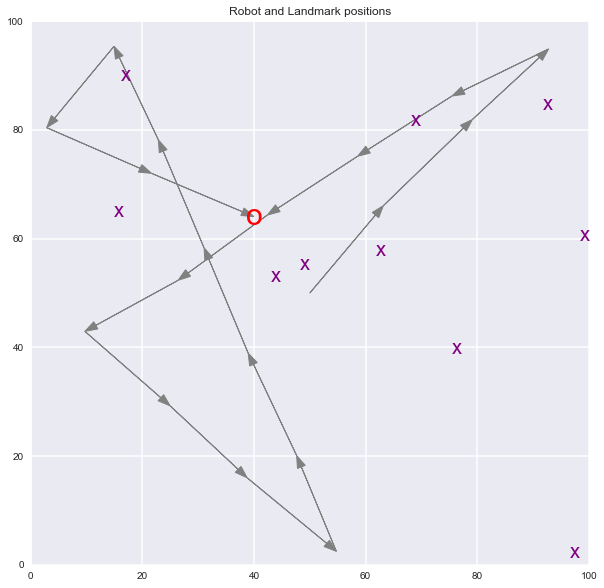

In [29]:
# Get estimated positions from SLAM result and plot them
poses, landmarks = slam.get_poses_landmarks()
world.display_world(poses, landmarks)

**Plotting resulting Omega and Xi matrices**

Next we will plot Omega and Xi resulting matrices from SLAM to see how they look like, we will make another data and slam but with less landmarks and steps for easier plotting, otherwise matrices would be very large.

In [30]:
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

In [32]:
num_landmarks_test = 2
steps_test = 3
world2 = World(world_size, num_landmarks_test)
world2.make_data(steps_test, measurement_range, motion_noise, measurement_noise)
slam2 = SLAM2D(steps_test, world_size, num_landmarks_test, measurement_noise, motion_noise)
slam2.run_slam(world2.data)

Generating world...

True positions:

Landmarks: [[34, 8], [46, 21]]
Robot location: [x = 46.374, y = 90.892]

Running SLAM...
Done!


### Omega

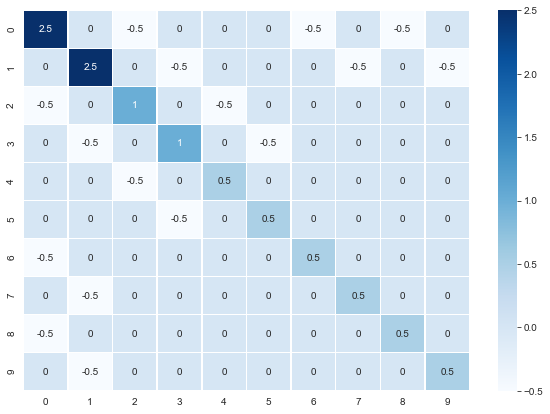

In [34]:
# define figure size
plt.rcParams["figure.figsize"] = (10,7)
# display omega
sns.heatmap(DataFrame(slam2.omega), cmap='Blues', annot=True, linewidths=.5);

### Xi

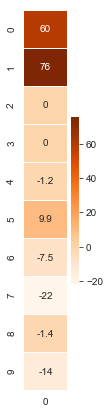

In [36]:
plt.rcParams["figure.figsize"] = (1,7)
# Display xi
sns.heatmap(DataFrame(slam2.xi), cmap='Oranges', annot=True, linewidths=.5);